<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.4. Обучаем модель ИНС

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 607.9178 - mae: 22.8154 - val_loss: 453.3368 - val_mae: 19.5809
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 500.3087 - mae: 20.2241 - val_loss: 317.7189 - val_mae: 15.9527
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 331.2785 - mae: 15.8436 - val_loss: 129.0027 - val_mae: 9.5807
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 125.2149 - mae: 8.7881 - val_loss: 62.9082 - val_mae: 5.5992
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 76.7467 - mae: 6.6318 - val_loss: 38.1116 - val_mae: 4.2192
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38.0114 - mae: 4.6763 - val_loss: 31.5205 - val_mae: 3.7655
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.9574 - mae: 4.0037 - val_loss: 26.7896 - val_mae: 3.3952
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.6509 - mae: 3.7222 - val_loss: 23.4757 - val_mae: 3.1056
Epoch 9/150
13/13 ━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = 'drive/MyDrive/neural_networks/2lab/'

Mounted at /content/drive


In [ ]:
model.save(drive_path + 'boston.keras')

#### 1.6. Делаем предсказания на тестовых данных

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Примеры предсказаний:
   Реальная цена (тыс. $)  Предсказанная цена (тыс. $)  \
0                    23.6                    26.383354   
1                    32.4                    33.266521   
2                    13.6                    16.155581   
3                    22.8                    23.507656   
4                    16.1                    16.141062   
5                    20.0                    20.718618   
6                    17.8                    18.209814   
7                    14.0                    14.921262   
8                    19.6                    23.924183   
9                    16.8                    18.634628   

   Абсолютная ошибка (тыс. $)  
0                    2.783354  
1                    0.866521  
2                    2.555581  
3                    0.707656  
4                    0.041062  
5                    0.718618  
6                    0.409814  
7                    0.921262  
8            

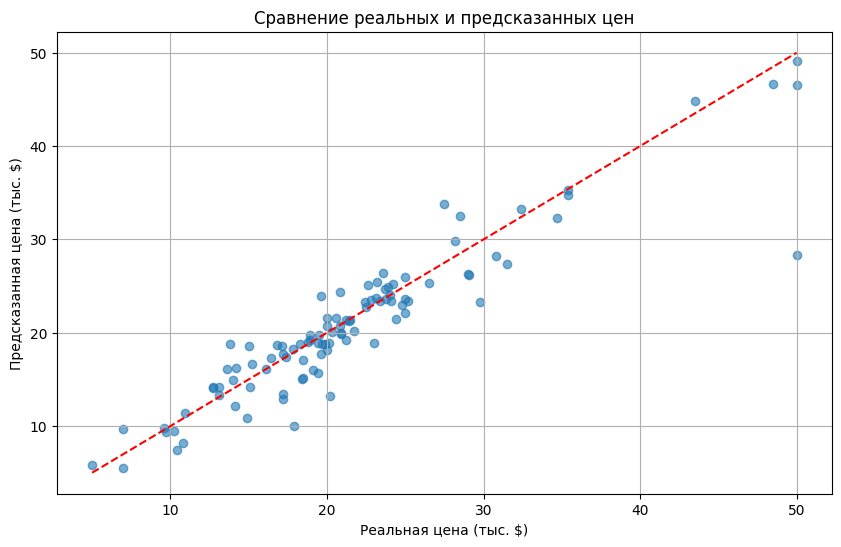

In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test).flatten()

# Создаем DataFrame для удобного сравнения реальных и предсказанных цен
results = pd.DataFrame({
    'Реальная цена (тыс. $)': y_test,
    'Предсказанная цена (тыс. $)': y_pred,
    'Абсолютная ошибка (тыс. $)': np.abs(y_test - y_pred)
})

# Выводим первые 10 предсказаний
print("Примеры предсказаний:")
print(results.head(10))

# Визуализация предсказаний vs реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Идеальная линия
plt.xlabel('Реальная цена (тыс. $)')
plt.ylabel('Предсказанная цена (тыс. $)')
plt.title('Сравнение реальных и предсказанных цен')
plt.grid(True)
plt.show()

#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
# Ваш код
test_loss, test_mae = model.evaluate(X_test, y_test) #значения потерь и MAE

# Вывод результатов
print('Тестовая ошибка (MSE):', test_loss)
print('MAE:', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4224 - mae: 1.8487
Тестовая ошибка (MSE): 10.426006317138672
MAE: 1.999686598777771


#### 1.8. Строим график обучения

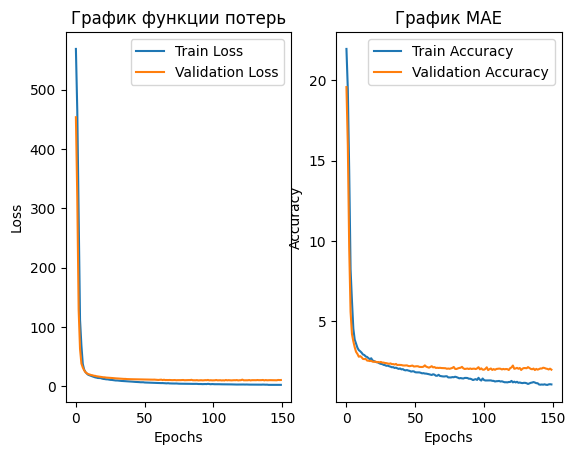

In [ ]:
# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь')

# График MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График MAE')

plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
!pip install gradio

import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import load_model
model = load_model(drive_path + 'boston.keras')

In [ ]:
def predict_price(*inputs):
    # Преобразуем входные данные в numpy array
    features = np.array(inputs).reshape(1, -1)

    # Масштабируем данные (используем тот же scaler, что и при обучении)
    features_scaled = scaler.transform(features)

    # Делаем предсказание
    prediction = model.predict(features_scaled, verbose=0)

    # Возвращаем результат (умножаем на 1000, так как цена в тысячах долларов)
    return f"Предсказанная цена: ${prediction[0][0]*1000:.2f}"

In [ ]:
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM (уровень преступности)", minimum=0, maximum=100, step=0.1, value=0.00632),
        gr.Slider(label="ZN (доля жилой земли)", minimum=0, maximum=100, step=0.1, value=18),
        gr.Slider(label="INDUS (доля нежилых площадей)", minimum=0, maximum=100, step=0.01, value=2.31),
        gr.Slider(label="CHAS (граница с рекой)", minimum=0, maximum=1, step=1, value=0),
        gr.Slider(label="NOX (концентрация оксидов азота)", minimum=0, maximum=1, step=0.01, value=0.53),
        gr.Slider(label="RM (среднее число комнат)", minimum=3, maximum=10, step=0.1, value=6.5),
        gr.Slider(label="AGE (доля домов старше 1940 г.)", minimum=0, maximum=100, step=1, value=65),
        gr.Slider(label="DIS (расстояние до центров занятости)", minimum=1, maximum=15, step=0.1, value=4),
        gr.Slider(label="RAD (доступность радиальных магистралей)", minimum=1, maximum=25, step=1, value=1),
        gr.Slider(label="TAX (налог на имущество)", minimum=150, maximum=800, step=10, value=296),
        gr.Slider(label="PTRATIO (соотношение учеников и учителей)", minimum=10, maximum=25, step=0.1, value=15),
        gr.Slider(label="B (доля афроамериканцев)", minimum=0, maximum=400, step=1, value=396),
        gr.Slider(label="LSTAT (доля населения низкого статуса)", minimum=0, maximum=40, step=0.1, value=5),
    ],
    outputs=gr.Text(label="Предсказанная цена"),
    title="Предсказание цены на жилье в Бостоне",
    description="Введите значения для 13 признаков и получите предсказание цены дома (в долларах).",
    live=False
)

#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a770bd2abd6506058e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a770bd2abd6506058e.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
import shutil
shutil.rmtree('dataset')

In [ ]:
import zipfile
import os

zip_path = 'drive/MyDrive/neural_networks/dataset.zip'
extract_dir = '.'

# Создаем папку для распаковки, если её нет
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

### 3. Указываем путь к набору данных:

In [ ]:
data_dir = 'dataset'

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = 'dataset'
classes = ['cars', 'motorbike', 'bus']
compression_size = 64

X = []
y = []

for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        # Пропускаем скрытые файлы и не-JPG файлы
        if img_name.startswith('.') or not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_name)
        try:
            image = cv2.imread(img_path)
            image = cv2.resize(image, (compression_size, compression_size)).flatten()
            X.append(image)
            y.append(class_idx)
        except Exception as e:
            print(f"Ошибка при обработке {img_path}: {e}")
            continue



#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
X = np.array(X, dtype="float") / 255.0
y = to_categorical(np.array(y), num_classes=3)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
input_shape = (compression_size * compression_size * 3,)

model = Sequential([
    Dense(1024,input_shape=input_shape, activation='relu'),
    Dense(896, activation='relu'),
    Dense(768, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)                    │ (None, 1024)                │      12,583,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 896)                 │         918,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 768)                 │         688,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,717,059 (56.14 MB)

 Trainable params: 14,717,059 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# Ваш код
INIT_LR = 0.001
BATCH_SIZE = 32
EPOCHS = 30

#### 5.3. Компилируем модель:

In [ ]:
# Ваш код
opt = Adam(
    learning_rate=INIT_LR,
)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
# Ваш код
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5),
    ModelCheckpoint(drive_path + 'best_model.keras', monitor='val_accuracy', save_best_only=True)
]


#### 6.2. Запустим процесс обучения модели:

In [ ]:
history = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              callbacks=[early_stopping, checkpoint])

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 420ms/step - accuracy: 0.5778 - loss: 0.9213 - val_accuracy: 0.6160 - val_loss: 0.8673
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.6536 - loss: 0.7843 - val_accuracy: 0.6600 - val_loss: 0.7992
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 350ms/step - accuracy: 0.7058 - loss: 0.7052 - val_accuracy: 0.7280 - val_loss: 0.6907
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.7276 - loss: 0.6700 - val_accuracy: 0.6813 - val_loss: 0.7730
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 355ms/step - accuracy: 0.7204 - loss: 0.6592 - val_accuracy: 0.6787 - val_loss: 0.7948
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.7669 - loss: 0.5871 - val_accuracy: 0.7000 - val_loss: 0.7040
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 333ms/step - accuracy: 0.7856 - loss: 0.5666 - val_accuracy: 0.7427 - val_loss: 0.6558
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - accuracy: 0.7724 - loss: 0.5563 - val_accu

#### 6.3. Загружаем лучшую модель:

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(drive_path + "best_model.keras")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

        cars       0.74      0.85      0.79       265
   motorbike       0.83      0.72      0.77       229
         bus       0.76      0.74      0.75       256

    accuracy                           0.77       750
   macro avg       0.78      0.77      0.77       750
weighted avg       0.78      0.77      0.77       750



#### 7.2. Выведем матрицу ошибок

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


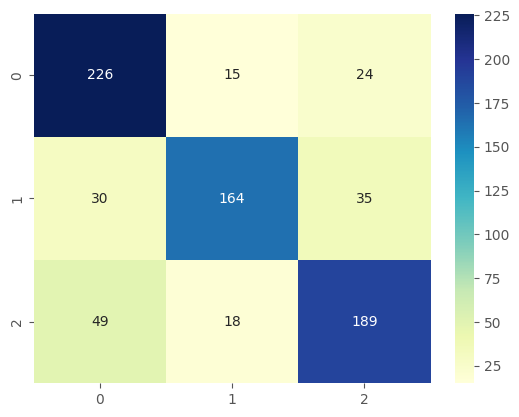

In [ ]:
# Ваш код
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_test, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(y_test, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

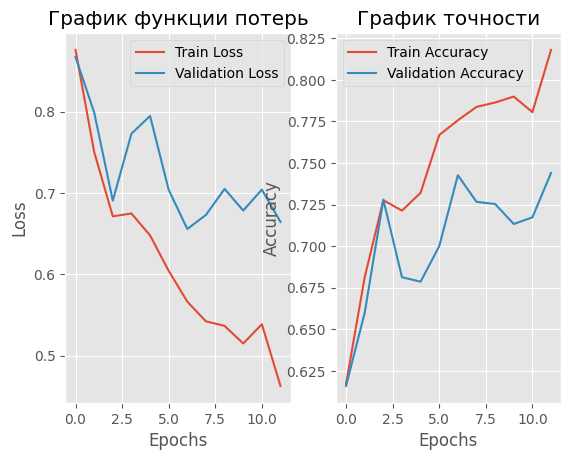

In [ ]:
# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь')

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График точности')

plt.show()

### 8. Сохранение модели и меток классов:

In [ ]:
lb = LabelBinarizer()
lb.fit(classes)
with open(drive_path + "labels", "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:
model.save(drive_path + '2lab_car_mt_bus.keras')

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# Ваш код
# Функция для предобработки изображения
def preprocess_image(img):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
# Ваш код
def predict_image(img, preprocess_func = preprocess_image):
    # Загружаем модель и метки
    model = load_model(drive_path + "2lab_car_mt_bus.keras")  # Загрузка модели Keras
    lb = pickle.loads(open(drive_path + "labels", "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Ваш код
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),
    outputs= gr.Label(num_top_classes=3),
    )

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://63760e0bd96daaa4fa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
